# Cost Profit Analysis

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
food_orders = pd.read_csv('food_orders_new_delhi.csv')
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


## Data Cleaning

#### 1. Duplicates Removal

In [6]:
food_orders.duplicated().sum()

0

#### 2. Null Removal

In [7]:
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

#### 3. Drop Unwanted Cols

In [8]:
food_orders.drop(columns='Order ID', inplace=True)

In [9]:
food_orders.shape

(1000, 11)

## EDA

#### Col : Customer ID

In [10]:
value_counts = food_orders['Customer ID'].value_counts()

In [11]:
from collections import Counter
counts = Counter(value_counts)
counts

Counter({1: 896, 2: 49, 3: 2})

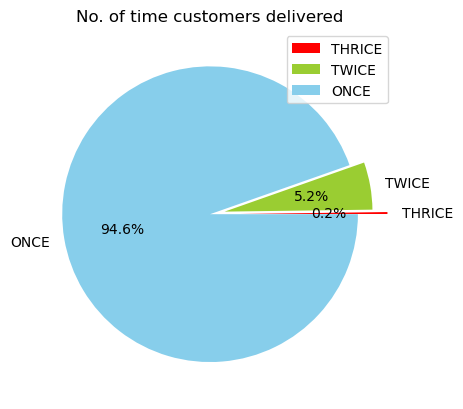

In [12]:
# this shows that how many time a customer got delivered 
plt.pie(x = counts.values(), labels=['THRICE', 'TWICE', 'ONCE'], autopct='%1.1f%%', explode=[0.2, 0.1, 0], colors=['red', 'yellowgreen', 'skyblue'])
plt.title('No. of time customers delivered')
plt.legend()
plt.show()

In [13]:
# have to find the customers ids which have the value counts > 1
morethan_once_customers = food_orders[food_orders['Customer ID'].duplicated()]['Customer ID']

In [14]:
len(morethan_once_customers)

53

In [15]:
customers = {}
for i, j in Counter(food_orders['Customer ID']).items():
    if j > 1:
        customers[i] = j

In [16]:
x = pd.DataFrame(customers.values(), index=customers.keys())

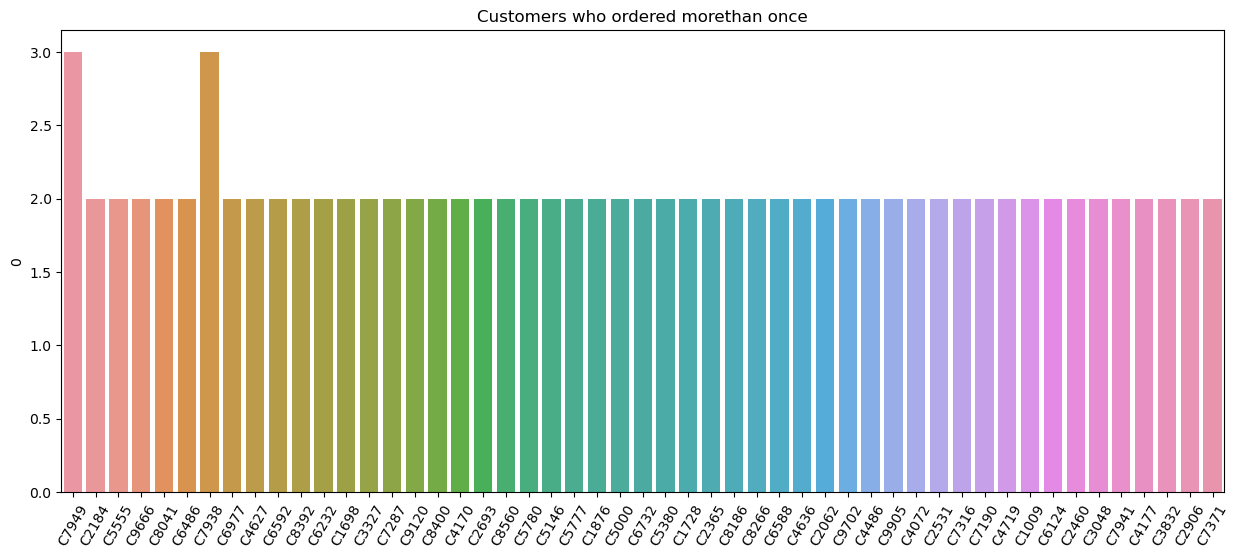

In [17]:
plt.figure(figsize = (15, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Customers who ordered morethan once')
plt.xticks(rotation = 60)
plt.show()

#### Col : Restaurant ID

In [18]:
value_counts = food_orders['Restaurant ID'].value_counts()

In [19]:
counts = Counter(value_counts)
counts

Counter({1: 348, 2: 196, 3: 55, 4: 16, 5: 5, 6: 1})

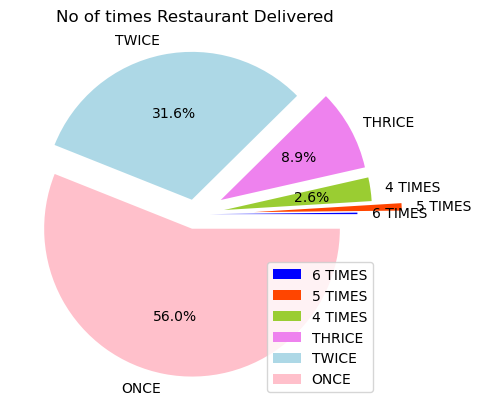

In [20]:
def my_autopct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''
    
plt.pie(x = counts.values(), autopct=my_autopct, 
        labels=['ONCE', 'TWICE', 'THRICE', '4 TIMES', '5 TIMES', '6 TIMES'][::-1],
        explode = [0.1, 0.4, 0.2, 0.2, 0.1, 0.1], 
        colors = ['blue', 'orangered', 'yellowgreen', 'violet', 'lightblue', 'pink']
       )
plt.title('No of times Restaurant Delivered')
plt.legend(loc = 'lower right')
plt.show()

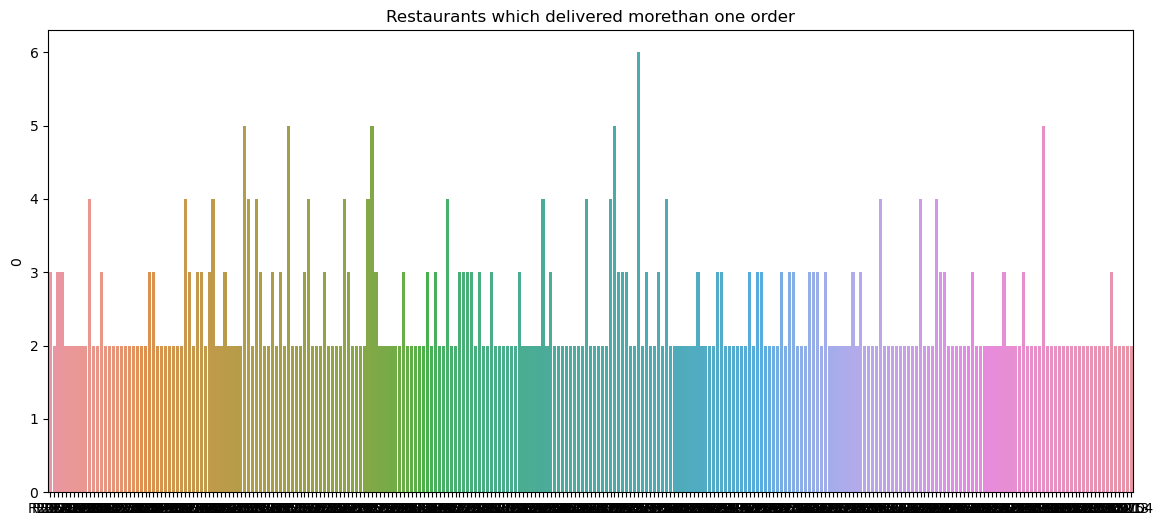

In [21]:
# lets filter out which restaurants have delivered more than once
morethan_once_restaurants = food_orders[food_orders['Restaurant ID'].duplicated()]['Restaurant ID']

counts = Counter(food_orders['Restaurant ID'])

restaurants = {}
for i, j in counts.items():
    if j > 1:
        restaurants[i] = j

x = pd.DataFrame(restaurants.values(), index=restaurants.keys())

plt.figure(figsize = (14, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Restaurants which delivered morethan one order')
plt.show()

In [22]:
len(morethan_once_restaurants)

379

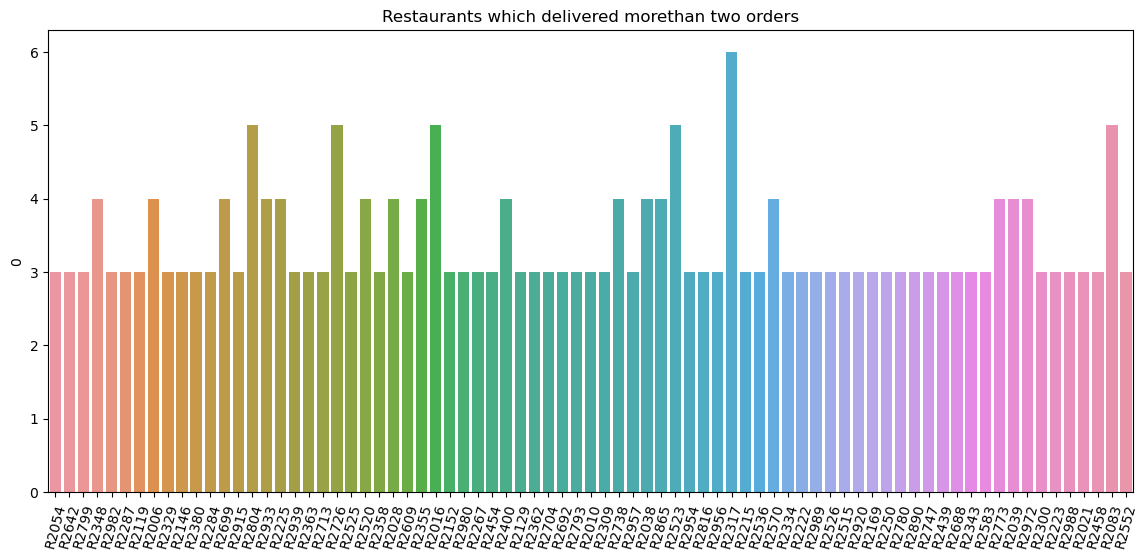

In [23]:
## lets filter out morethan twice delivered restuarants
restaurants = {}
for i, j in counts.items():
    if j > 2:
        restaurants[i] = j

x = pd.DataFrame(restaurants.values(), index=restaurants.keys())

plt.figure(figsize = (14, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Restaurants which delivered morethan two orders')
plt.xticks(rotation= 75)
plt.show()

In [24]:
len(x)

77

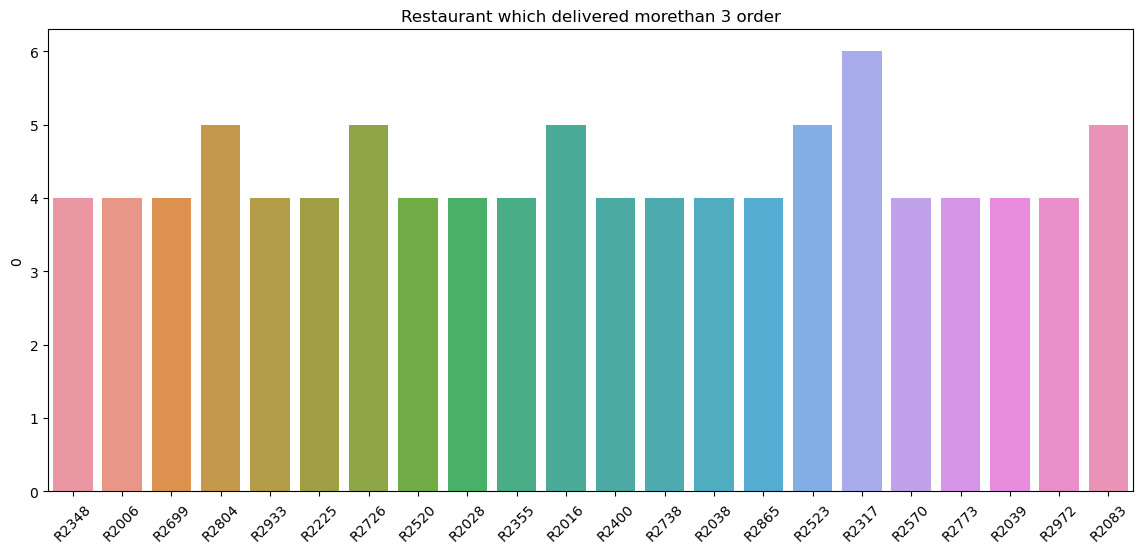

In [25]:
# lets filter out more than thrice delivered restaurants
restaurants = {}
for i, j in counts.items():
    if j > 3:
        restaurants[i] = j

x = pd.DataFrame(restaurants.values(), index=restaurants.keys())

plt.figure(figsize = (14, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Restaurant which delivered morethan 3 order')
plt.xticks(rotation=45)
plt.show()

#### Col : Order Date and Time

In [26]:
# lets change the type of Order Date and Time to date time format
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])

In [27]:
food_orders['Order Month']=food_orders['Order Date and Time'].dt.month_name()
food_orders['Order Time']=food_orders['Order Date and Time'].dt.hour
food_orders.drop(columns='Order Date and Time', inplace = True)

def food_time(time):
    if time >= 0 and time < 6:
        return 'mid-night meal'
    elif time >=6 and time < 12:
        return 'breakfast'
    elif time >= 12 and time < 20:
        return 'lunch'
    else:
        return 'dinner'
        
food_orders['Meal'] = food_orders['Order Time'].apply(food_time)
food_orders.drop(columns='Order Time', inplace=True)

In [28]:
food_orders.head()

,Customer ID,Restaurant ID,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal
0,C8270,R2924,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,February,mid-night meal
1,C1860,R2054,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,February,dinner
2,C6390,R2870,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,January,mid-night meal
3,C6191,R2642,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,January,dinner
4,C6734,R2799,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,January,mid-night meal


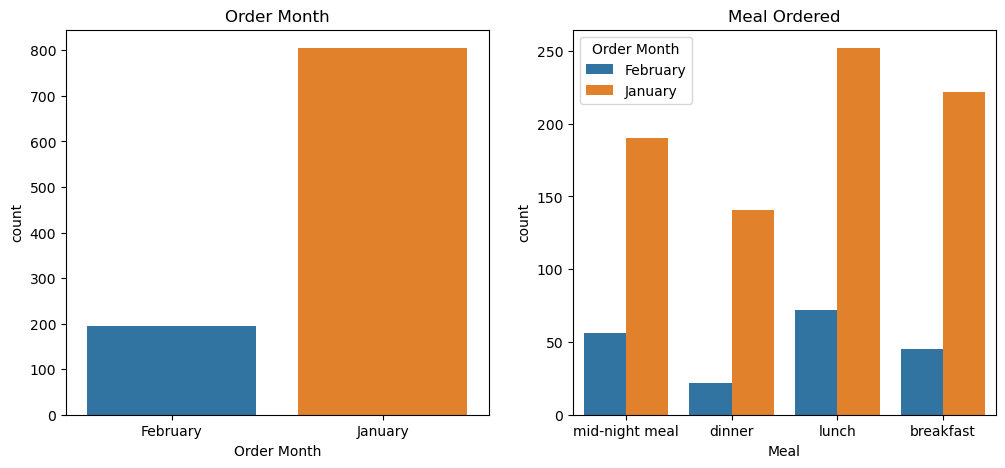

In [29]:
# lets check which months getting more orders

plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Order Month', data = food_orders)
plt.title('Order Month')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Meal', data = food_orders, hue= 'Order Month')
plt.title('Meal Ordered')
plt.show()

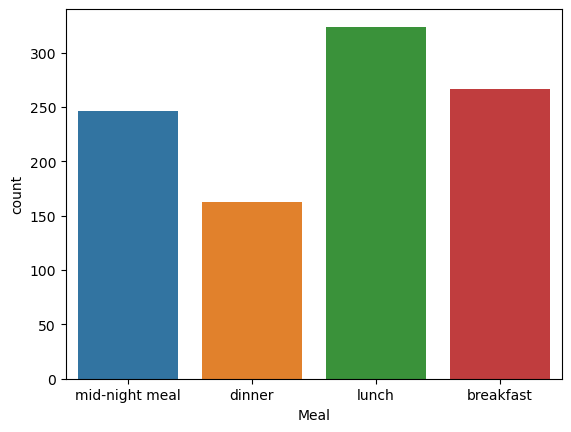

In [30]:
sns.countplot(x = 'Meal', data = food_orders)
plt.show()

#### Col : Delivery Date and Time

In [31]:
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [32]:
food_orders['Delivery Day'] = food_orders['Delivery Date and Time'].dt.day_name()
food_orders.drop(columns='Delivery Date and Time', inplace=True)

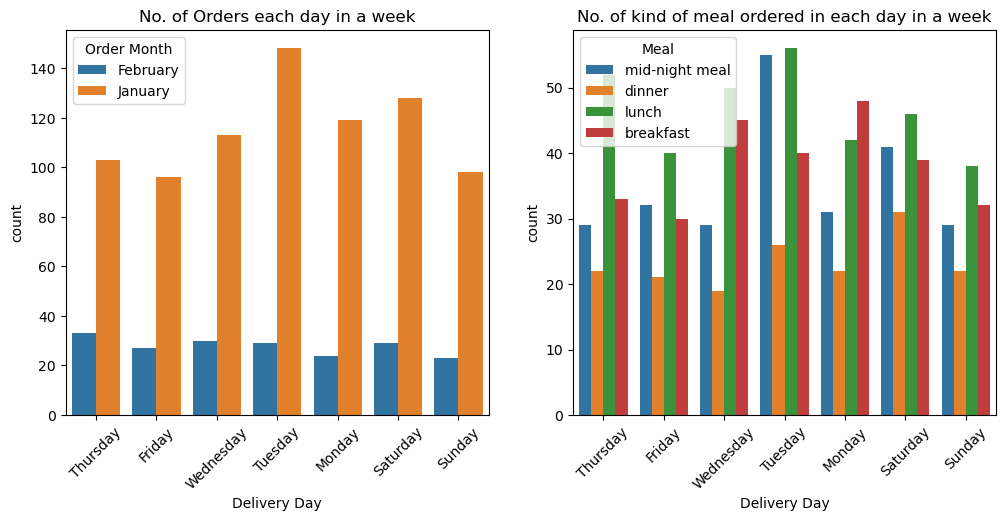

In [33]:
plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Delivery Day', data = food_orders, hue = 'Order Month')
plt.title('No. of Orders each day in a week')
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(x = 'Delivery Day', data = food_orders, hue = "Meal")
plt.title('No. of kind of meal ordered in each day in a week')
plt.xticks(rotation = 45)
plt.show()

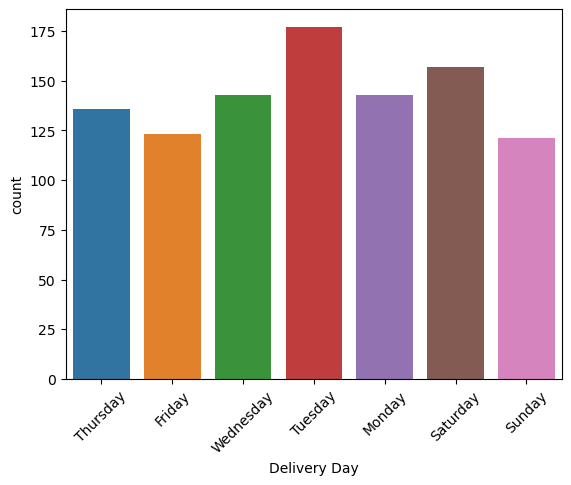

In [34]:
sns.countplot(x = food_orders['Delivery Day'])
plt.xticks(rotation = 45)
plt.show()

In [35]:
food_orders.head()

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal,Delivery Day
0,C8270,R2924,1914,0,Credit Card,5% on App,150,47,0,February,mid-night meal,Thursday
1,C1860,R2054,986,40,Digital Wallet,10%,198,23,0,February,dinner,Friday
2,C6390,R2870,937,30,Cash on Delivery,15% New User,195,45,0,January,mid-night meal,Wednesday
3,C6191,R2642,1463,50,Cash on Delivery,NaN,146,27,0,January,dinner,Tuesday
4,C6734,R2799,1992,30,Cash on Delivery,50 off Promo,130,50,0,January,mid-night meal,Monday


#### Col : Order Value

In [36]:
food_orders['Order Value'].describe()

count    1000.000000
mean     1053.969000
std       530.975339
min       104.000000
25%       597.750000
50%      1038.500000
75%      1494.000000
max      1995.000000
Name: Order Value, dtype: float64

In [37]:
import warnings
warnings.filterwarnings('ignore')

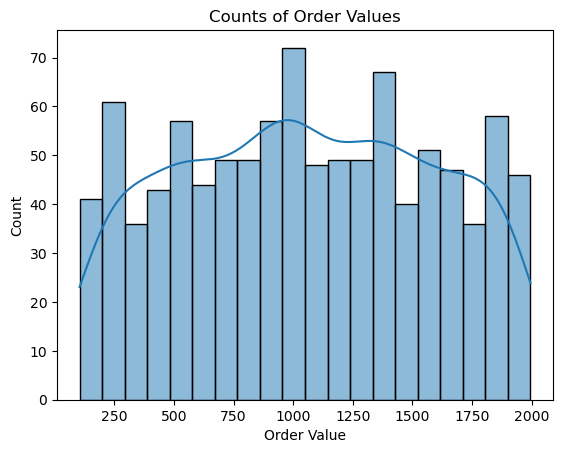

In [38]:
sns.histplot(x = 'Order Value', data = food_orders, bins = 20, kde=True)
plt.title('Counts of Order Values')
plt.show()

#### Col : Delivery Fee

In [39]:
food_orders['Delivery Fee'].describe()

count    1000.000000
mean       28.620000
std        16.958278
min         0.000000
25%        20.000000
50%        30.000000
75%        40.000000
max        50.000000
Name: Delivery Fee, dtype: float64

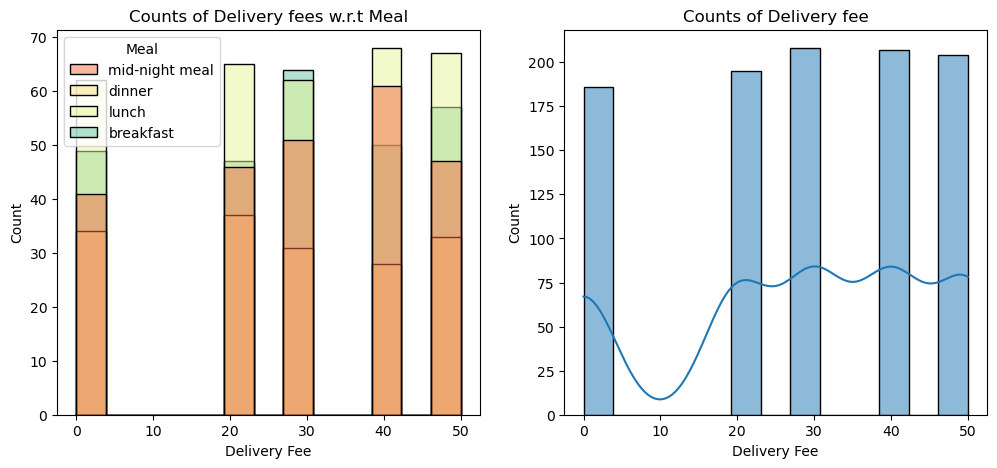

In [40]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = 'Delivery Fee', data = food_orders, hue = 'Meal', palette='Spectral')
plt.title('Counts of Delivery fees w.r.t Meal')

plt.subplot(1, 2, 2)
sns.histplot(x = 'Delivery Fee', data = food_orders, kde = True)
plt.title('Counts of Delivery fee')
plt.show()

In [41]:
food_orders.head()

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal,Delivery Day
0,C8270,R2924,1914,0,Credit Card,5% on App,150,47,0,February,mid-night meal,Thursday
1,C1860,R2054,986,40,Digital Wallet,10%,198,23,0,February,dinner,Friday
2,C6390,R2870,937,30,Cash on Delivery,15% New User,195,45,0,January,mid-night meal,Wednesday
3,C6191,R2642,1463,50,Cash on Delivery,NaN,146,27,0,January,dinner,Tuesday
4,C6734,R2799,1992,30,Cash on Delivery,50 off Promo,130,50,0,January,mid-night meal,Monday


#### Col : Payment Method

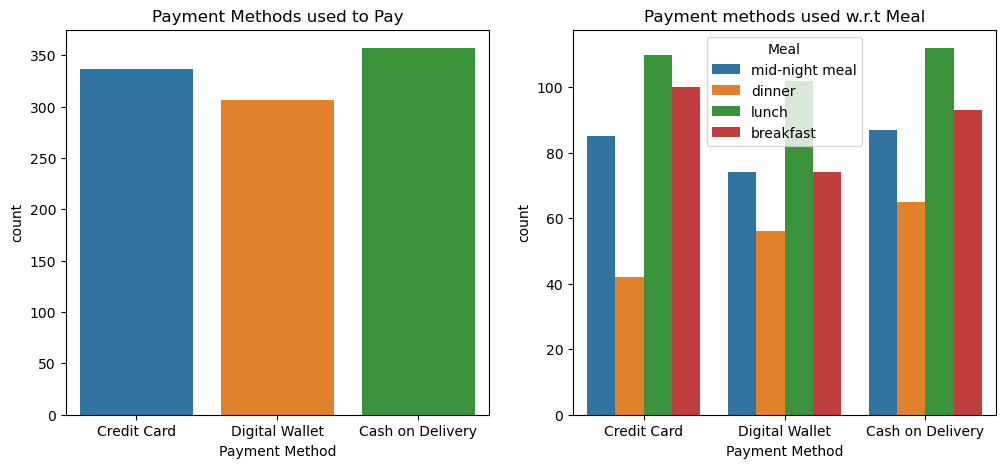

In [42]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Payment Method', data = food_orders)
plt.title('Payment Methods used to Pay')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Payment Method', data = food_orders, hue = 'Meal')
plt.title('Payment methods used w.r.t Meal')

plt.show()

#### Col : Discounts and Offers

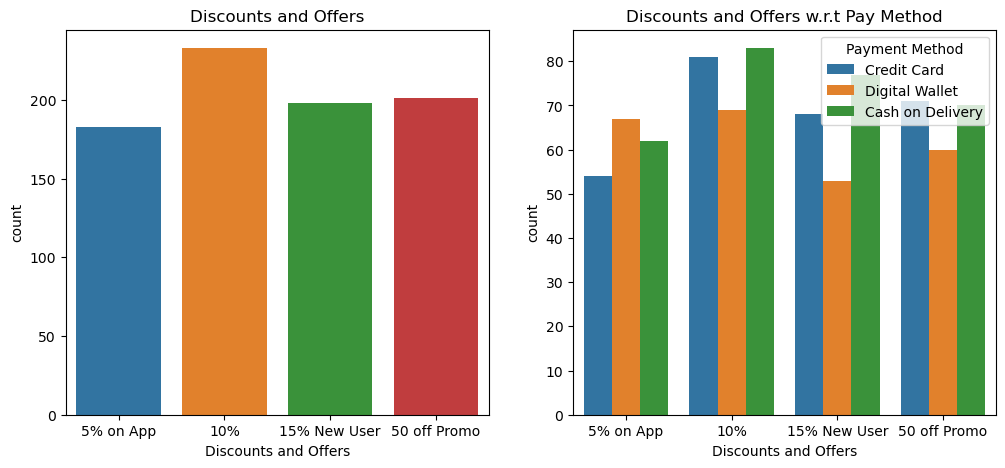

In [43]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Discounts and Offers', data = food_orders)
plt.title('Discounts and Offers')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Discounts and Offers', data = food_orders, hue = 'Payment Method')
plt.title('Discounts and Offers w.r.t Pay Method')

plt.show()

#### Col : Commission Fee

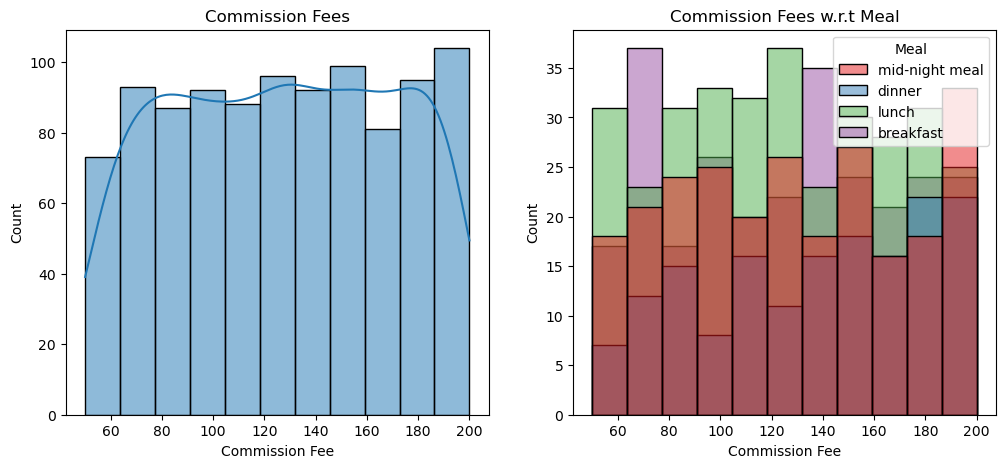

In [44]:
plt.subplots(1, 2, figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x = 'Commission Fee', data = food_orders, kde = True)
plt.title('Commission Fees')

plt.subplot(1, 2, 2)
sns.histplot(x = 'Commission Fee', data = food_orders, hue = "Meal", palette='Set1')
plt.title('Commission Fees w.r.t Meal')

plt.show()

#### Col : Payment Processing Fee

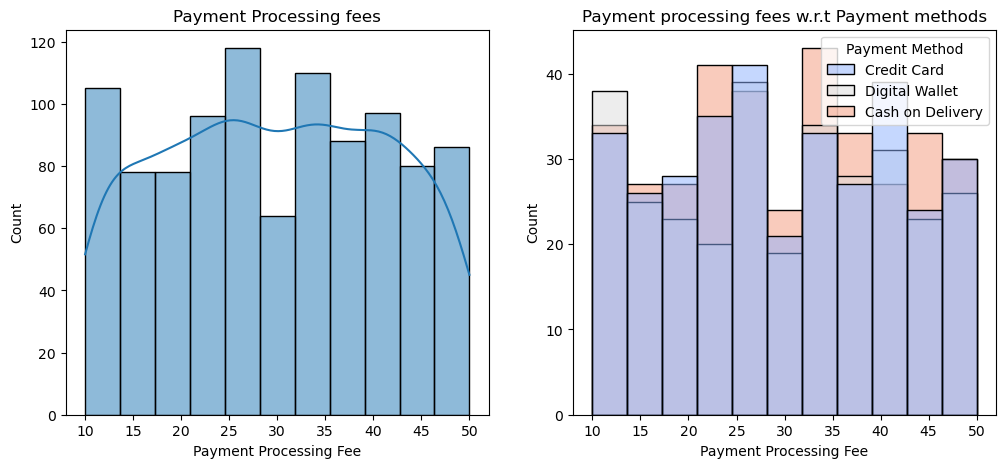

In [45]:
plt.subplots(1, 2, figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x = 'Payment Processing Fee', kde = True, data = food_orders)
plt.title('Payment Processing fees')

plt.subplot(1, 2, 2)
sns.histplot(x = "Payment Processing Fee", data = food_orders, hue = 'Payment Method', palette='coolwarm')
plt.title('Payment processing fees w.r.t Payment methods')

plt.show()

#### Col : Refunds/Chargebacks

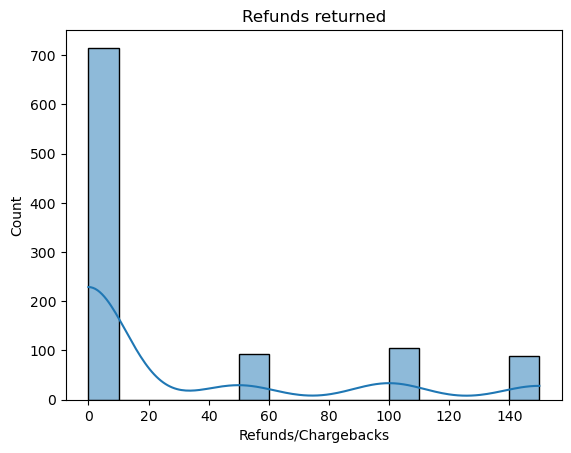

In [46]:
sns.histplot(x = 'Refunds/Chargebacks', kde = True, data = food_orders)
plt.title('Refunds returned')
plt.show()

In [47]:
totalOrders = food_orders[food_orders['Refunds/Chargebacks'] > 0]['Refunds/Chargebacks']

In [48]:
percentage_of_orders = len(totalOrders)/1000*100
percentage_of_orders

28.499999999999996

## Insights from the above EDA

##### 1. 5.4 % customers are ordered food more than once (It means they are ordering frequently, we need to take care of them to order more....)
##### - 94.6 % customers only ordered food once, model should recommend them to order more

##### 2. 44 % of restaurants delivered food more than once, (It means we should recommend the foods of these restaurants)
##### - 12.4 % of restaurants delivered food more than twice, (Customers liking to buy the food from these restaurants, which should be used for recommending)
##### - 3.5 % of restaurants delivered food more than thrice, (It means these restaurants provide good food, which should be recommended)

##### 3. When Order timing is considered, customers are buying the meals as below given:
##### - Lunch > Breakfast > Mid-night Meal > Dinner

##### 4. Food ordered with respect to days, as following:
##### - Tuesday > Saturday > Monday, Wednesday > Thursday > Friday > Sunday

##### 5. with respect food cost, customers ordered food when cost > 250 and cost < 1800

##### 6. Delivery fee is earned during the following meal more:
##### - Mid-night Meal > Dinner > Lunch > Breakfast

##### 7. Paymethods used more as following:
##### - Cash on delivery > Credit Card > Digital wallet

##### 8. Offers and Discounts mostly used:
##### - 10% > 50 off promo > 15% > 5% on app

##### 9. with respect to commission fee, customers ordered food when fee > 60 and < 180

##### 10. with respect to processing fee, customers ordered food when fee > 13 and < 43

##### 11. when there is a refund or chargeback, 28.5% of customers are ordering

## Data Preprocessing

#### Finding Discounts

In [49]:
food_orders.fillna('0', inplace=True)

In [50]:
food_orders['Discounts and Offers']=food_orders['Discounts and Offers'].apply(lambda x: x.split()[0])

In [51]:
food_orders['Discounts and Offers']=pd.Series(zip(food_orders['Order Value'],food_orders['Discounts and Offers']))

In [52]:
def Discount(tuple):
    order_value, discount_value = tuple
    if discount_value.endswith('%'):
        return order_value * int(discount_value.split('%')[0])/100
    else:
        return int(discount_value)

In [53]:
food_orders['Discounts and Offers'] = food_orders['Discounts and Offers'].apply(Discount)

In [54]:
food_orders['Profit'] = food_orders['Order Value'] - (food_orders['Delivery Fee'] + food_orders['Commission Fee'] + food_orders['Payment Processing Fee'] + food_orders['Refunds/Chargebacks'] + food_orders['Discounts and Offers'])

In [55]:
food_orders.head()

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal,Delivery Day,Profit
0,C8270,R2924,1914,0,Credit Card,95.70,150,47,0,February,mid-night meal,Thursday,1621.30
1,C1860,R2054,986,40,Digital Wallet,98.60,198,23,0,February,dinner,Friday,626.40
2,C6390,R2870,937,30,Cash on Delivery,140.55,195,45,0,January,mid-night meal,Wednesday,526.45
3,C6191,R2642,1463,50,Cash on Delivery,0.00,146,27,0,January,dinner,Tuesday,1240.00
4,C6734,R2799,1992,30,Cash on Delivery,50.00,130,50,0,January,mid-night meal,Monday,1732.00


#### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(food_orders.drop(columns=['Customer ID', 'Restaurant ID', 'Order Month', 'Profit']),
                                                    food_orders['Profit'], test_size=.2, random_state=70)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

#### Quantiles and Stats

In [67]:
food_orders.describe()

,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Profit
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,1053.969000,28.620000,74.289850,126.99000,29.832000,28.300000,765.93715
std,530.975339,16.958278,68.688494,43.06405,11.627165,49.614228,510.93695
min,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000,-238.30000
25%,597.750000,20.000000,26.837500,90.00000,20.000000,0.000000,340.12500
50%,1038.500000,30.000000,50.000000,127.00000,30.000000,0.000000,751.25000
75%,1494.000000,40.000000,101.100000,164.00000,40.000000,50.000000,1170.08750
max,1995.000000,50.000000,299.250000,200.00000,50.000000,150.000000,1886.00000


#### Column Transformer Pipeline

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), 
                                      ['Order Value', 'Delivery Fee', 'Discounts and Offers', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']), 
                                     ('encoder', OrdinalEncoder(categories=[['Cash on Delivery', 'Credit Card', 'Digital Wallet'], 
                                                                            ['lunch', 'breakfast', 'mid-night meal', 'dinner'], 
                                                                            ['Tuesday', 'Saturday', 'Monday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']]),
                                      ['Payment Method', 'Meal', 'Delivery Day'])], remainder='passthrough', sparse_threshold=0)

## Model Pipeline

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([('transformer', ct), 
                 ('model', LinearRegression())])
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Order Value',
                                                   'Delivery Fee',
                                                   'Discounts and Offers',
                                                   'Commission Fee',
                                                   'Payment Processing Fee',
                                                   'Refunds/Chargebacks']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Cash '
                                                                              'on '
                                                                              'Delivery',
                                                                              'Credit '
                                                                              'Card',
                                                                              'Digital '
                                                                              'Wallet'],
                                                                             ['lunch',
                                                                              'breakfast',
                                                                              'mid-night '
                                                                              'meal',
                                                                              'dinner'],
                                                                             ['Tuesday',
                                                                              'Saturday',
                                                                              'Monday',
                                                                              'Wednesday',
                                                                              'Thursday',
                                                                              'Friday',
                                                                              'Sunday']]),
                                                  ['Payment Method', 'Meal',
                                                   'Delivery Day'])])),
                ('model', LinearRegression())])

## Pipeline Training

In [70]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Order Value',
                                                   'Delivery Fee',
                                                   'Discounts and Offers',
                                                   'Commission Fee',
                                                   'Payment Processing Fee',
                                                   'Refunds/Chargebacks']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Cash '
                                                                              'on '
                                                                              'Delivery',
                                                                              'Credit '
                                                                              'Card',
                                                                              'Digital '
                                                                              'Wallet'],
                                                                             ['lunch',
                                                                              'breakfast',
                                                                              'mid-night '
                                                                              'meal',
                                                                              'dinner'],
                                                                             ['Tuesday',
                                                                              'Saturday',
                                                                              'Monday',
                                                                              'Wednesday',
                                                                              'Thursday',
                                                                              'Friday',
                                                                              'Sunday']]),
                                                  ['Payment Method', 'Meal',
                                                   'Delivery Day'])])),
                ('model', LinearRegression())])

## Pipeline Evaluation

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = pipe.predict(X_test)
print('r-squared score: ', r2_score(y_test, y_pred))
print('mse: ', mean_squared_error(y_test, y_pred))

r-squared score:  1.0
mse:  3.640887164940436e-25


## Pipeline Prediction

In [75]:
costs = {'Order Value': [1981, 832],
 'Delivery Fee': [0, 50], 
 'Payment Method': ['Digital Wallet', 'Credit Card'], 
 'Discounts and Offers': [198.10, 124.80],
 'Commission Fee': [61, 106],
 'Payment Processing Fee': [45, 36],
 'Refunds/Chargebacks': [0, 0],
 'Meal': ['breakfast', 'breakfast'],
 'Delivery Day': ['Saturday', 'Wednesday']
}

In [76]:
pipe.predict(pd.DataFrame(costs))

array([1676.9,  515.2])